In [32]:
from astroquery.simbad import Simbad
from astropy.table import Table
list_of_objects = Table([["bet Cru"]], names=["query_objects"])
query = """--sql 
         SELECT oid FROM basic
           JOIN TAP_UPLOAD.objectList
           ON basic.main_id = TAP_UPLOAD.objectList.query_objects
        """
output=Simbad.query_tap(query, objectList=list_of_objects)
for row in output:
  for key in row.keys():
    print(f"{key}: {row[key]}")

oid: 3312681


In [34]:
from astroquery.simbad import Simbad
from astropy.table import Table
object='bet Cru'
query = f"""--sql 
         SELECT * FROM basic
           Where basic.main_id = '{object}'
        """
output=Simbad.query_tap(query )
oid=output['oid'][0]
print(output[0]['main_id'])
print(oid)
for key in output[0].keys():
  print(f"{key}: {output[key][0]}")

* bet Cru
3312681
main_id: * bet Cru
nbref: 352
otype: bC*
ra: 191.9302865619529
ra_prec: 9
dec: -59.68877199622606
dec_prec: 9
coo_err_maj: 6.325733184814453
coo_err_maj_prec: 2
coo_err_min: 5.981187343597412
coo_err_min_prec: 2
coo_err_angle: 113
coo_qual: A
coo_wavelength: O
coo_bibcode: 2007A&A...474..653V
hpx: 11017108
pmra: -42.97
pmra_prec: 2
pmdec: -16.18
pmdec_prec: 2
pm_err_maj: 0.7200000286102295
pm_err_maj_prec: 2
pm_err_min: 0.6800000071525574
pm_err_min_prec: 2
pm_err_angle: 0
pm_qual: A
pm_bibcode: 2007A&A...474..653V
plx_value: 11.71
plx_prec: 2
plx_err: 0.9800000190734863
plx_err_prec: 2
plx_qual: A
plx_bibcode: 2007A&A...474..653V
rvz_type: v
rvz_radvel: 10.3
rvz_radvel_prec: 2
rvz_redshift: 3.435769203097294e-05
rvz_redshift_prec: --
rvz_err: 0.20000000298023224
rvz_err_prec: 1
rvz_nature: 
rvz_qual: A
rvz_bibcode: 2004A&A...424..727P
vlsr: --
vlsr_err: --
vlsr_wavelength: 
vlsr_bibcode: 
vlsr_min: --
vlsr_max: --
sp_type: B1IV
sp_qual: C
sp_bibcode: 2009A&A...501..2

In [36]:
# All alternative names 
query = f"""--sql 
         SELECT id FROM ident
           Where oidref = '{oid}'
        """
output=Simbad.query_tap(query )
for row in output:
  for key in row.keys():
    print(f"{key}: {row[key]}")
 

id: HIP 62434
id: TIC 405567821
id: SBC9 2446
id: * bet Cru
id: CCDM J12478-5940A
id: CEL   4154
id: CPC 20  3932
id: CPD-59  4451
id: CSI-59  4451 41
id: FK5  481
id: GC 17374
id: GCRV  7661
id: GEN# +1.00111123
id: GSC 08659-03107
id: HD 111123
id: HGAM   2011
id: HIC  62434
id: HR  4853
id: IDS 12419-5908 A
id: JP11  2298
id: N30 2947
id: NAME Mimosa
id: PPM 341305
id: ROT  1887
id: SAO 240259
id: SKY# 23820
id: TD1 16475
id: TYC 8659-3107-1
id: UBV   11480
id: UBV M  18628
id: V* bet Cru
id: [B10]  3328
id: 2MASS J12474326-5941194
id: ALS 14974
id: PLX 2941.01
id: EUVE J1247-59.6
id: 1RXS J124742.5-594125
id: WDS J12477-5941A
id: IRAS 12448-5925
id: AKARI-IRC-V1 J1247432-594119
id: uvby98 100111123
id: WEB 11084
id: [KCS2016] J124743.26-594119.5
id: CXOU J124743.8-594121


In [ ]:
# distance  
query = f"""--sql 
         SELECT dist,unit FROM mesDistance
           Where oidref = '{oid}'
        """
output=Simbad.query_tap(query )
distance=output['dist'][0]
distance_unit=output['unit'][0]  
print(f"distance={distance} {distance_unit}")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# flux  
query = f"""--sql 
         SELECT * FROM allfluxes
           Where oidref = '{oid}'
        """
output=Simbad.query_tap(query )
for row in output:
  for key in row.keys():
    print(f"{key}: {row[key]}")

U: 0.029999999329447746
oidref: 3312681
B: 1.0199999809265137
V: 1.25
G: --
R: 1.3799999952316284
I: 1.6399999856948853
J: 1.7999999523162842
H: 1.9199999570846558
K: 1.9900000095367432
F150W: --
F200W: --
F444W: --
u_: --
g_: --
r_: --
z_: --
i_: --


In [27]:
# distances  
# 
query = f"""--sql 
     SELECT TOP 50 dist,unit,
     IF(unit='pc', dist,null) as dist_pc,
       FROM mesDistance
    """
output=Simbad.query_tap(query )
print(output)
query = f"""--sql 
         SELECT DISTINCT unit FROM mesDistance
        """
output=Simbad.query_tap(query )
print(output)

DALQueryError: Incorrect ADQL query:  Encountered "=". Was expecting one of: ")" "." "," "." "," ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" ")" "." "." "," ")" ")" ")" ")" "." "."

[['A', np.float64(1228.803), np.float64(217449798.24346533)], ['A', np.float64(482.975), np.float64(30397503.555884056)], ['A', np.float64(505.3568), np.float64(33280116.918140765)], ['A', np.float64(1480.385), np.float64(302385900.9947217)], ['A', np.float64(1275.8357), np.float64(224595828.9492014)], ['F', np.float64(575.308), np.float64(47414975.141707174)], ['F', np.float64(596.8011), np.float64(51023932.89217161)], ['K', np.float64(435.635), np.float64(21773396.264069095)], ['K', np.float64(468.8892), np.float64(25224415.19815525)], ['K', np.float64(287.224), np.float64(8366134.348458634)], ['K', np.float64(291.5027), np.float64(8617247.083779668)], ['F', np.float64(218.403), np.float64(5232886.126507088)], ['F', np.float64(218.7322), np.float64(5248673.129476181)], ['K', np.float64(647.417), np.float64(40925979.25409641)], ['K', np.float64(675.4475), np.float64(44546550.42027025)], ['A', np.float64(418.235), np.float64(21189839.210329387)], ['A', np.float64(411.709), np.float64(2

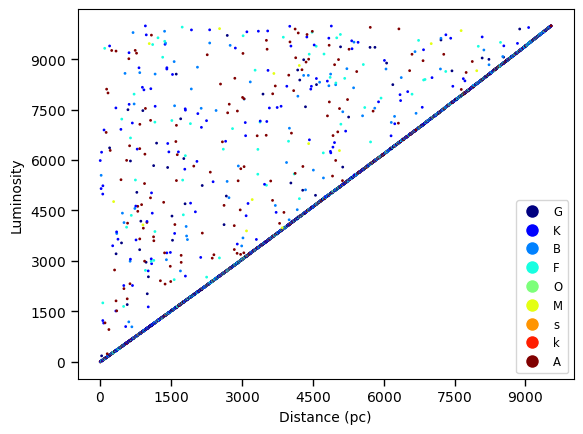

In [ ]:
# distances  
# 
from astroquery.simbad import Simbad
from astropy.table import Table
from matplotlib.ticker import MaxNLocator,ScalarFormatter

import math

query = f"""--sql 
  select b.main_id,b.rvz_redshift,b.sp_type ,d.dist,d.unit ,f.flux, f.filter,md.diameter,md.unit as "dunit"
    from basic b
    join mesDistance d on b.oid=d.oidref
    join flux f on b.oid=f.oidref
    join mesDiameter md on b.oid=md.oidref
   where b.otype='*' 
     and b.sp_type is not null
     and f.filter = 'V'
    """
output=Simbad.query_tap(query )
starData=[]
for row in output:
  def process_star_data(row):
    type = row['sp_type'][0]
    distance = row['dist']
    distance_unit = row['unit'].strip()

    if distance_unit == 'pc':
      distance_pc = distance
    elif distance_unit == 'kpc':
      distance_pc = distance * 1000
    elif distance_unit == 'Mpc':
      distance_pc = distance * 1000000
    else:
      distance_pc = 0
    diameter = row['diameter']
    diameter_unit = row['dunit'].strip()
    if diameter_unit == 'km':
      #radius in solar radii
      radius = diameter / 6.96e5
    else:
      radius = 0
      

    flux = row['flux']
    if distance_pc > 0:
      luminosity = 4 * math.pi * distance_pc**2 * flux
      #luminosity in solar units
      LSolar = luminosity / 3.828
      return [type, distance_pc, LSolar]
    return None

  for row in output:
    star_data = process_star_data(row)
    if star_data:
      starData.append(star_data)
      

# Generate a scatter plot of distance vs luminosity
import matplotlib.pyplot as plt
import numpy as np
# Extract types and assign unique colors
types = np.array([row[0] for row in starData])
unique_types = list(set(types))
colors = plt.cm.jet(np.linspace(0, 1, len(unique_types)))
type_to_color = {t: colors[i] for i, t in enumerate(unique_types)}
color_values = np.array([type_to_color[t] for t in types])

starData=np.array(starData)
plt.scatter(starData[:,1],starData[:,2],c=color_values,label='Stars',s=1)
plt.xlabel('Distance (pc)')
plt.ylabel('Luminosity')
plt.legend(fontsize='small')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.tick_params(axis='both', which='major', length=5, width=1)
plt.tick_params(axis='both', which='minor', length=3, width=1)
# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=type) for type, color in type_to_color.items()]
plt.legend(handles=handles, fontsize='small')


plt.show()

In [ ]:
from astroquery.simbad import Simbad
from astropy.table import Table
list_of_objects = Table([["M1"]], names=["Messier_objects"])
query = """--sql 
         SELECT ident.* FROM basic
           JOIN TAP_UPLOAD.messiers
           ON basic.main_id = TAP_UPLOAD.messiers.Messier_objects
           JOIN ident ON basic.oid = ident.oidref
           LEFT OUTER JOIN mesDistance ON (mesDistance.oidref = basic.oid)
        """
output=Simbad.query_tap(query, messiers=list_of_objects)
for row in output:
  for key in row.keys():
    print(f"{key}: {row[key]}")